# Salaries in Science


#### Kayla Wen, Colin Chen, Paria Sokhanran, Justin Leung 

## Part I: Introduction
The decision of what to study in university is an undeniable challenge many students encounter. Whether it be the Sciences, Arts, or Business, there is an abundance of pathways that scholars could potentially pursue. For most, the goal is to finish their degree and get a well-paying job after graduation. As current university students, our group is interested in investigating the correlation between one’s academic success and their future financial status. Therefore, we aim to answer the following question: How can one’s grades be used to determine their future salary in the field of Science? To accomplish this, we will use a data set taken from Kaggle, which includes multiple files with information about individuals’ majors, grades, career prospects, and other personal information such as age. Furthermore, we will also be using an Excel file that shows the entry averages for various Science majors at UBC. 

## Part II: Preliminary Exploratory Data Analysis

In [3]:
#Run this cell first

library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 15)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

#### Import GPA of Science Majors Data (from UBC)

In [4]:
## reads the data of the GPA of Science Majors in UBC Undergrauates
gpa_data <- read_csv(file = "https://raw.githubusercontent.com/colin-c/Salaries-in-Science/main/data/ubc-science-gpa.csv") |>
    rename("Min_Grade" = "Min Grade") |>
    select(Year, Spec, Min_Grade) |>
    filter((Year == 2022) | (Year == 2021) | (Year == 2020)) |>
    filter((Spec == "Major (1263): Environmental Sciences (ENSC)") |
           (Spec == "Major (3095): Biology (BIOL)") |
           (Spec == "Major (0244): Biochemistry (BIOC)") |
           (Spec == "Major (1153): Microbiology and Immunology (MBIM)") |
           (Spec == "Major (0311): Pharmacology (PCTH)") |
           (Spec == "Major (3742): Neuroscience") |
           (Spec == "Major (0376): Computer Science (CPSC) Domestic Students Only") |
           (Spec == "Major (0456): Mathematics (MATH)") |
           (Spec == "Combined Honours (0009): Physics and Astronomy (PHYS, ASTR)") |
           (Spec == "Major (0409): Chemistry (CHEM)") |
           (Spec == "Major (1223): Earth and Ocean Sciences (EOSC)") |
           (Spec == "Combined Major (3125): Oceanography and Biology") |
           (Spec == "Major (0524) Physics (PHYS)")) 

gpa_data <- gpa_data |>
    group_by(Spec) |>
    summarize(Average_Min_Grade = mean(Min_Grade))

## fix naming
gpa_data <- gpa_data |>
    mutate(Spec = case_when
           (Spec == "Major (1263): Environmental Sciences (ENSC)" ~ "Environmental Sciences",
            Spec == "Major (3095): Biology (BIOL)" ~ "Biology",
            Spec == "Major (0244): Biochemistry (BIOC)" ~ "Biochemistry",
            Spec == "Major (1153): Microbiology and Immunology (MBIM)" ~ "Microbiology and Immunology",
            Spec == "Major (0311): Pharmacology (PCTH)" ~ "Pharmacology",
            Spec == "Major (3742): Neuroscience" ~ "Neuroscience",
            Spec == "Major (0376): Computer Science (CPSC) Domestic Students Only" ~ "Computer Science",
            Spec == "Major (0456): Mathematics (MATH)" ~ "Mathematics",
            Spec == "Combined Honours (0009): Physics and Astronomy (PHYS, ASTR)" ~ "Physics and Astronomy",
            Spec == "Major (0409): Chemistry (CHEM)" ~ "Chemistry",
            Spec == "Major (1223): Earth and Ocean Sciences (EOSC)" ~ "Earth Science",
            Spec == "Combined Major (3125): Oceanography and Biology" ~ "Oceanography",
            Spec == "Major (0524) Physics (PHYS)" ~ "Physics")) 

gpa_data <- gpa_data |>
    rename(Major = Spec)
 
    
gpa_data

Rows: 480 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Option, Spec, Space
dbl (6): Year, Intial Admit
Number, Inital Reject 
Number, Final Admit 
Numb...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Major,Average_Min_Grade
<chr>,<dbl>
Physics and Astronomy,77.11667
Oceanography,58.23333
Biochemistry,72.25000
Pharmacology,86.49333
Computer Science,81.28333
Chemistry,56.83667
Mathematics,67.46000
Physics,56.60000
Microbiology and Immunology,82.45000


#### Import Science Major and Salary Data

In [8]:
## reads the data of the average salary of graduates with a certain degree and major
major_data <- read_csv(file = "https://raw.githubusercontent.com/colin-c/Salaries-in-Science/main/data/all-ages.csv") |>
    select(Major, Median, P25th, P75th) |>
    filter((Major == "ENVIRONMENTAL SCIENCE") |
           (Major == "BIOLOGY") |
           (Major == "BIOCHEMICAL SCIENCES") |
           (Major == "MICROBIOLOGY") |
           (Major == "PHARMACOLOGY") |
           (Major == "NEUROSCIENCE") |
           (Major == "COMPUTER SCIENCE") |
           (Major == "MATHEMATICS") |
           (Major == "ASTRONOMY AND ASTROPHYSICS") |
           (Major == "CHEMISTRY") |
           (Major == "GEOLOGY AND EARTH SCIENCE") |
           (Major == "OCEANOGRAPHY") |
           (Major == "PHYSICS")) 

## fix naming
major_data <- major_data |>
    mutate(Major = case_when
           (Major == "ENVIRONMENTAL SCIENCE" ~ "Environmental Sciences",
            Major == "BIOLOGY" ~ "Biology",
            Major == "BIOCHEMICAL SCIENCES" ~ "Biochemistry",
            Major == "MICROBIOLOGY" ~ "Microbiology and Immunology",
            Major == "PHARMACOLOGY" ~ "Pharmacology",
            Major == "NEUROSCIENCE" ~ "Neuroscience",
            Major == "COMPUTER SCIENCE" ~ "Computer Science",
            Major == "MATHEMATICS" ~ "Mathematics",
            Major == "ASTRONOMY AND ASTROPHYSICS" ~ "Physics and Astronomy",
            Major == "CHEMISTRY" ~ "Chemistry",
            Major == "GEOLOGY AND EARTH SCIENCE" ~ "Earth Science",
            Major == "OCEANOGRAPHY" ~ "Oceanography",
            Major == "PHYSICS" ~ "Physics")) |>
    rename(Median_Salary = Median)

major_data

Rows: 173 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Major, Major_category
dbl (10): index, Major_code, Total, Employed, Employed_full_time_year_round,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Major,Median_Salary,P25th,P75th
<chr>,<dbl>,<dbl>,<dbl>
Environmental Sciences,52000,38000,75000
Computer Science,78000,51000,105000
Biology,51000,35000,80000
Biochemistry,53000,33000,82000
Microbiology and Immunology,60000,40000,85000
Pharmacology,60000,35000,105000
Neuroscience,35000,28000,52000
Mathematics,66000,42000,100000
Physics and Astronomy,80000,40000,106000


## Merging Data and Filtering

In [9]:
all_data <- merge(gpa_data, major_data, by = "Major")
all_data

Major,Average_Min_Grade,Median_Salary,P25th,P75th
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Biochemistry,72.25000,53000,33000,82000
Biology,54.26000,51000,35000,80000
Chemistry,56.83667,59000,38700,90000
Computer Science,81.28333,78000,51000,105000
Earth Science,55.49333,65000,42000,100000
Environmental Sciences,63.75000,52000,38000,75000
Mathematics,67.46000,66000,42000,100000
Microbiology and Immunology,82.45000,60000,40000,85000
Neuroscience,79.21000,35000,28000,52000


Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


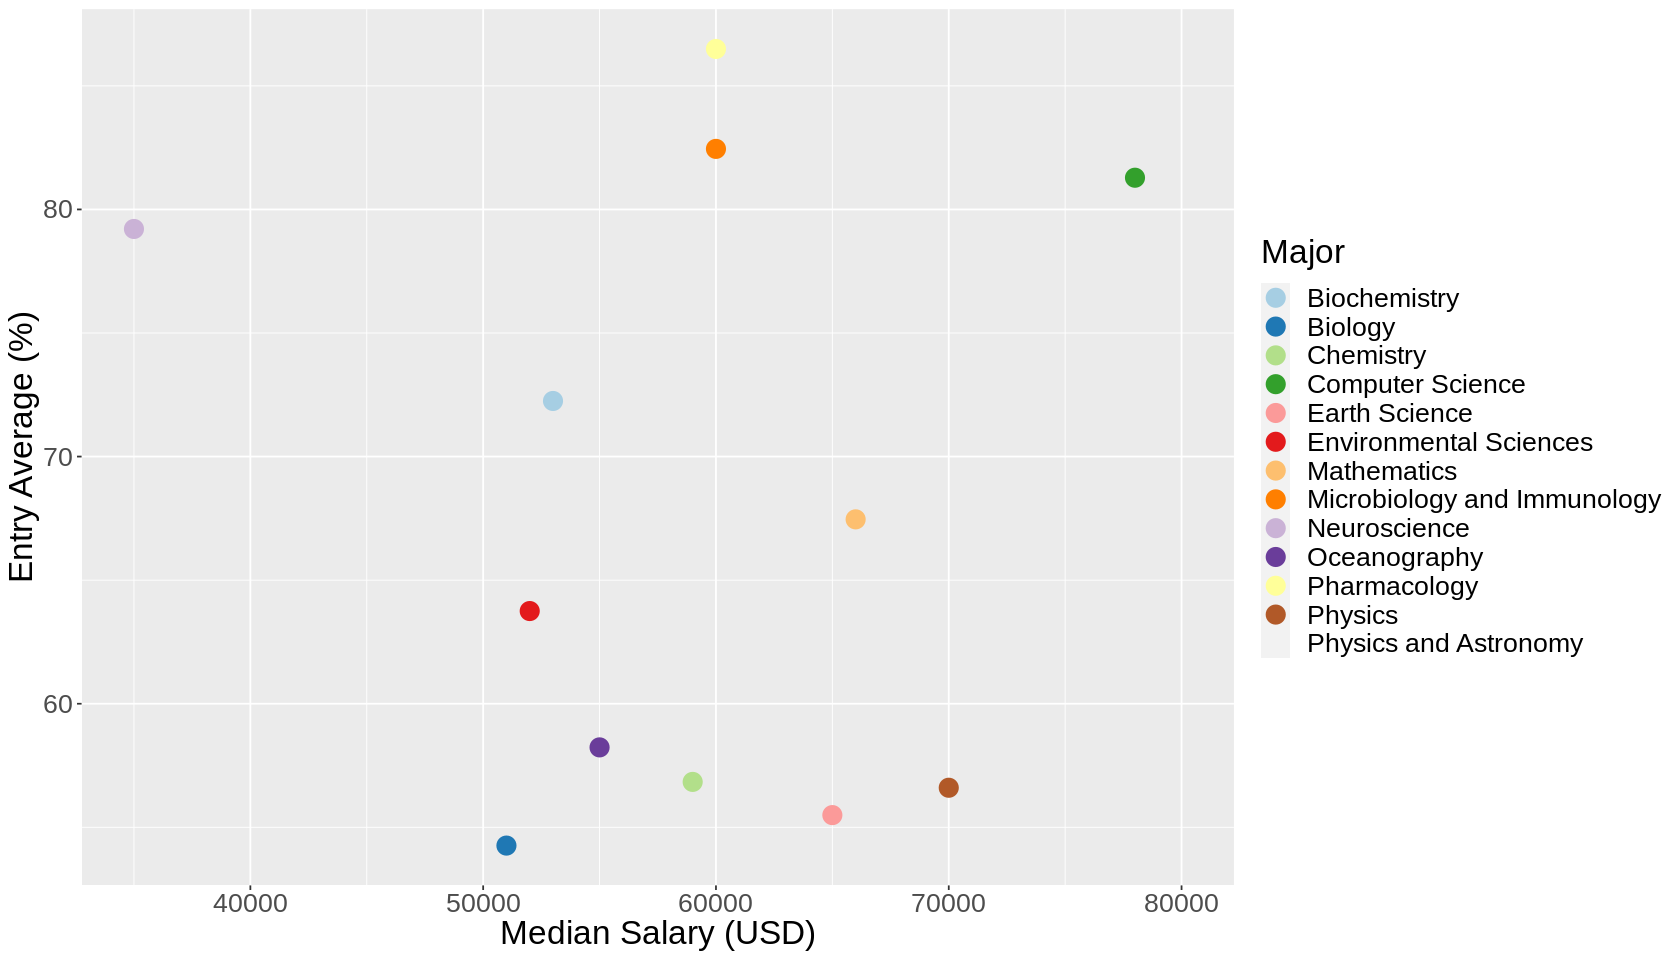

In [10]:
library(RColorBrewer)

options(repr.plot.width = 14, repr.plot.height = 8)

plot <- all_data |>
    ggplot(mapping = aes (x = Median_Salary, y = Average_Min_Grade)) +
    geom_point(size = 5, aes(color = Major)) +
    labs(x = "Median Salary (USD)", y = "Entry Average (%)", color = "Major") +
    theme(text = element_text(size=20)) +
    scale_color_brewer(palette="Paired")
    
plot

## Part III: Methods
We will conduct our data analysis by using the techniques and functions from the worksheets and tutorial sets and expect much of our coding to be based on the content we have learned through the course so far. We will merge a data set from Kaggle with data from UBC’s second-year specializations file. For the Kaggle data set, we intend to mainly use the information from the columns “major” and “salary”, focusing our attention on majors under the Faculty of Science. We will focus on the “min grade” column of select science majors for the UBC data set. Furthermore, We will take an average of 2020, 2021, and 2022 data, representing the average grade requirement for entry into that specialization. To visualize our findings, we will be creating a scatter plot. The x-axis will be labeled “Entry Average (%)”, and the y-axis will be labeled “Median Salary (USD)”. The points will be color coded to represent each of the majors, and we will use a colorblind-friendly palette to ensure inclusivity. In addition, we have included a 25th and 75th percentile salary column in our table, and we intend to create additional plots to provide a more comprehensive perspective on the relationship between the competitiveness for a major and its post-graduation outcomes. 


## Part IV: Expected Outcomes and Significance

While all educational backgrounds have opportunities for success in their fields, we expect the Computer Science major alumni to have the highest salaries post-university. This prediction is mainly based on our personal experiences in our undergraduate journey and the availability of opportunities within this major immediately after graduation. We also expect this to be the outcome because of the many drastic discoveries in the technology field compared to other industries, such as the Life Sciences. Depending on how accurate our prediction is, this model could ultimately lead to more students pursuing Computer Science as their focus, resulting in more competition to get into this major. If this is the case, this scenario could cause some difficulties for universities in showcasing the strengths of their other programs. Consequently, a potential problem may arise: How can more interest be generated for majors in which the post-graduation salaries are not as high? 

